In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

## Tied Pennsylvania

In [2]:
N = 9_000_000
sigma = 0.05
payoff = 11_000_000_000

In [3]:
p = 1 / (np.sqrt(2 * np.pi) * N * sigma)

In [4]:
p

8.865384008920726e-07

In [5]:
p * payoff

9751.922409812798

## Pennsylvania with a polling differential

In [6]:
delta = 0.056

In [7]:
p = 1 / (np.sqrt(2 * np.pi) * N * sigma) * np.exp(-delta**2 / (8 * sigma**2))

In [8]:
p

7.578795302896723e-07

In [9]:
p * payoff

8336.674833186395

## Accounting for the tipping point probability

In [10]:
p_tip = 0.36

In [11]:
p * p_tip

2.72836630904282e-07

In [12]:
p * p_tip * payoff

3001.202939947102

## California

In [13]:
N = 21_000_000

In [14]:
delta = 0.29

In [15]:
p = 1 / (np.sqrt(2 * np.pi) * N * sigma) * np.exp(-delta**2 / (8 * sigma**2))

In [16]:
p_tip = 0.01

In [17]:
p * p_tip

5.6690784950246276e-11

In [18]:
p * p_tip * payoff

0.623598634452709

## Third Party

### Effective sample size

In [19]:
1 / (2 * sigma)**2

99.99999999999999

### Bayesian analysis

#### Prior

In [20]:
Neff = 12
alpha = .1
beta = Neff - alpha

In [21]:
X = np.linspace(0, 1, num=1000)

In [22]:
prior = X**alpha * (1 - X)**beta / scipy.special.beta(alpha+1, beta+1)

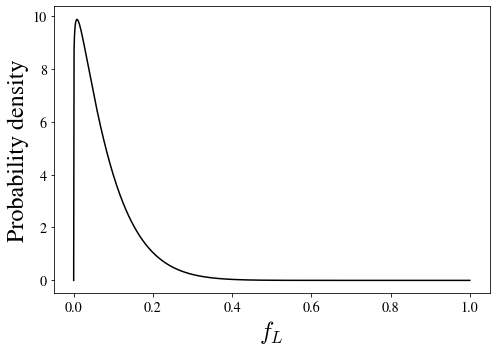

In [23]:
plt.figure(figsize=(7, 5))
plt.plot(X, prior, c='k')
plt.xlabel(r'$f_L$')
plt.ylabel('Probability density')
plt.tight_layout()

In [24]:
Neff = 100

In [25]:
Neff * .018

1.7999999999999998

In [26]:
posterior = (
    X**(1.1 + .018 * Neff - 1) * (1 - X)**(11.9 + (1 - .018) * Neff - 1)
    / scipy.special.beta(1.1 + .018 * Neff, 11.9 + (1 - .018) * Neff)
)

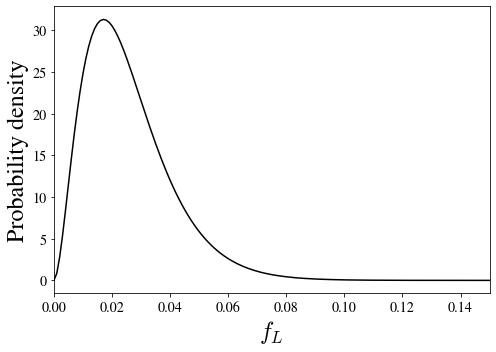

In [27]:
plt.figure(figsize=(7, 5))
plt.plot(X, posterior, c='k')
plt.xlim([0, 0.15])
plt.xlabel(r'$f_L$')
plt.ylabel('Probability density')
plt.tight_layout()

#### Probability of a decisive vote

In [28]:
N = 150_000_000

In [29]:
fL = 0.05
fhat = 0.018
Neff = 100
alpha = 1.1
beta = 11.9

In [30]:
pL = (
    fL**(fhat * Neff + alpha - 1) * (1 - fL)**((1 - fhat) * Neff + beta - 1)
    / (N * scipy.special.beta(alpha + fhat * Neff, beta + (1 - fhat) * Neff))
)

In [31]:
pL

3.906127727658849e-08

In [32]:
payoff = 100_000_000

In [33]:
pL * payoff

3.9061277276588493